In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('display.max_colwidth', None)     # Show full cell content

In [162]:
df = pd.read_csv(r'D:\NTI\Machine Learning 2025 NTI\Lab 5 Support Vector Machine\Task\Student_Done.csv')

In [163]:
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,Fall_GPA,Spring_GPA,Passed_Count,Failed_Count,Incomplete_Count,First_Completion_Rate,Second_Completion_Rate,Total_Attempt_Hours,Total_Earned_Hours,Total_Completion_Rate,Need_Coverage_Ratio,Unmet_Need_Ratio,Net_Cost,Financial_Difficulty,Major_Category
0,7808615,18,F,BGD 1,Y,N,1150.0,Fall 2007,Spring 2008,On Campus,0,150.0,4.00,SCHOOL 50,No Information,No Information,Bachelors,16,16,14.0,14.0,0,0,0,0.0,4.000000,4.000000,6,0,0,1.0,1.0,30.0,30.0,1.0,0.000000,0.000000,0,0.0,Undeclared
1,7830063,19,F,BGD 1,N,N,1190.0,Fall 2008,Spring 2009,Off Campus,1,69.0,2.89,SCHOOL 389,College/Beyond,College/Beyond,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0,4.000000,3.666667,6,0,0,1.0,1.0,36.0,36.0,1.0,0.579572,0.338777,570000,1029300.0,Undeclared
2,7847538,18,M,BGD 1,Y,N,1030.0,Fall 2010,Spring 2011,On Campus,1,150.0,3.39,SCHOOL 82,High School,Other/Unknown,Bachelors,15,15,14.0,14.0,0,0,0,0.0,4.000000,4.000000,6,0,0,1.0,1.0,29.0,29.0,1.0,0.000000,0.000000,0,0.0,STEM
3,8006429,18,M,BGD 1,Y,N,1220.0,Fall 2007,Spring 2008,On Campus,1,150.0,2.93,SCHOOL 180,College/Beyond,College/Beyond,Bachelors,13,13,14.0,14.0,0,0,0,0.0,3.666667,4.000000,6,0,0,1.0,1.0,27.0,27.0,1.0,0.000000,0.000000,0,0.0,Undeclared
4,7962680,18,F,BGD 1,Y,N,1190.0,Fall 2008,Spring 2009,Off Campus,1,69.0,3.86,SCHOOL 2,College/Beyond,High School,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0,4.000000,4.000000,6,0,0,1.0,1.0,24.0,24.0,1.0,0.383431,0.205302,835920,1114260.0,Arts & Humanities


In [164]:
# useless columns for modeling 

df = df.drop(columns=['STUDENT IDENTIFIER','INTERNATIONAL_STS','HIGH_SCHL_NAME','IN_STATE_FLAG'])

In [165]:
cat = df.select_dtypes(include='object')

for i in cat:
    display(df[i].value_counts())

STDNT_GENDER
F    2140
M    1260
Name: count, dtype: int64

STDNT_BACKGROUND
BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: count, dtype: int64

FIRST_TERM
Fall 2009    676
Fall 2010    632
Fall 2008    581
Fall 2007    521
Fall 2006    497
Fall 2005    493
Name: count, dtype: int64

SECOND_TERM
Spring 2010    676
Spring 2011    632
Spring 2009    581
Spring 2008    521
Spring 2007    497
Spring 2006    493
Name: count, dtype: int64

HOUSING_STS
Off Campus    1981
On Campus     1419
Name: count, dtype: int64

FATHER_HI_EDU_DESC
High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: count, dtype: int64

MOTHER_HI_EDU_DESC
College/Beyond               1500
High School                  1223
No Information                489
Other/Unknown                 117
Middle School/Junior High      71
Name: count, dtype: int64

DEGREE_GROUP_DESC
Bachelors           3384
Associate             12
Career Associate       4
Name: count, dtype: int64

Major_Category
STEM                 886
Arts & Humanities    622
Undeclared           460
Business             451
Health               341
Social Sciences      273
Education            240
Other                127
Name: count, dtype: int64

### Encoding 

In [166]:
# One hot encoding 
df = pd.get_dummies(df,columns=['STDNT_GENDER','HOUSING_STS'], drop_first=True)

In [167]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['Major_Category','STDNT_BACKGROUND'])

df = encoder.fit_transform(df)

In [168]:
df['FIRST_TERM'] = df['FIRST_TERM'].str[-4:].astype(int)
df['SECOND_TERM'] = df['SECOND_TERM'].str[-4:].astype(int)


In [169]:
len(df[df['FIRST_TERM'] == df['SECOND_TERM']])

0

In [170]:
encoder = ce.OneHotEncoder(
cols=['FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_DESC'], use_cat_names=True)

df = encoder.fit_transform(df)


In [171]:
ordinal = ce.OrdinalEncoder(cols=['FIRST_TERM','SECOND_TERM'])

df = ordinal.fit_transform(df)

In [172]:
df.columns

Index(['STDNT_AGE', 'STDNT_BACKGROUND_1', 'STDNT_BACKGROUND_2',
       'STDNT_BACKGROUND_3', 'STDNT_BACKGROUND_4', 'STDNT_BACKGROUND_5',
       'STDNT_BACKGROUND_6', 'STDNT_BACKGROUND_7', 'STDNT_BACKGROUND_8',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'SECOND_TERM',
       'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA',
       'FATHER_HI_EDU_DESC_No Information',
       'FATHER_HI_EDU_DESC_College/Beyond', 'FATHER_HI_EDU_DESC_High School',
       'FATHER_HI_EDU_DESC_Middle School/Junior High',
       'FATHER_HI_EDU_DESC_Other/Unknown', 'MOTHER_HI_EDU_DESC_No Information',
       'MOTHER_HI_EDU_DESC_College/Beyond', 'MOTHER_HI_EDU_DESC_Other/Unknown',
       'MOTHER_HI_EDU_DESC_High School',
       'MOTHER_HI_EDU_DESC_Middle School/Junior High',
       'DEGREE_GROUP_DESC_Bachelors', 'DEGREE_GROUP_DESC_Associate',
       'DEGREE_GROUP_DESC_Career Associate', 'FIRST_TERM_ATTEMPT_HRS',
       'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS',
       'SECOND_TERM_EARNED_HR

In [173]:
x = df.drop(columns='RETURNED_2ND_YR',axis=1)

y = df['RETURNED_2ND_YR']

x.shape , y.shape

((3400, 59), (3400,))

In [174]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

for i in [x_train, x_test, y_train, y_test]:
    display(i.shape)

(2720, 59)

(680, 59)

(2720,)

(680,)

In [175]:
df.describe()

,STDNT_AGE,STDNT_BACKGROUND_1,STDNT_BACKGROUND_2,STDNT_BACKGROUND_3,STDNT_BACKGROUND_4,STDNT_BACKGROUND_5,STDNT_BACKGROUND_6,STDNT_BACKGROUND_7,STDNT_BACKGROUND_8,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_College/Beyond,FATHER_HI_EDU_DESC_High School,FATHER_HI_EDU_DESC_Middle School/Junior High,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Associate,DEGREE_GROUP_DESC_Career Associate,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,Fall_GPA,Spring_GPA,Passed_Count,Failed_Count,Incomplete_Count,First_Completion_Rate,Second_Completion_Rate,Total_Attempt_Hours,Total_Earned_Hours,Total_Completion_Rate,Need_Coverage_Ratio,Unmet_Need_Ratio,Net_Cost,Financial_Difficulty,Major_Category_1,Major_Category_2,Major_Category_3,Major_Category_4,Major_Category_5,Major_Category_6,Major_Category_7,Major_Category_8
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3.400000e+03,3.400000e+03,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,17.994118,0.612353,0.278529,0.027647,0.040882,0.001471,0.031176,0.005588,0.002353,997.361765,3.556471,3.556471,0.787353,99.598529,3.203286,0.127059,0.385000,0.392941,0.028529,0.066471,0.143824,0.441176,0.034412,0.359706,0.020882,0.995294,0.003529,0.001176,13.989412,12.205000,14.269118,12.541176,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04,2.601078,2.684020,5.072059,0.861765,0.066176,0.872166,0.875799,28.258529,24.746176,0.873486,0.292410,0.011250,2.068436e+05,3.756230e+05,0.135294,0.260588,0.182941,0.132647,0.080294,0.100294,0.070588,0.037353
std,0.552052,0.487285,0.448341,0.163984,0.198047,0.038326,0.173820,0.074556,0.048457,145.136548,1.730365,1.730365,0.409240,234.345241,0.451844,0.333088,0.486667,0.488476,0.166504,0.249140,0.350962,0.496601,0.182311,0.479985,0.143012,0.068448,0.059313,0.034285,1.552041,2.986294,2.041116,3.364152,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05,0.902080,0.891993,1.285553,1.255178,0.271263,0.189540,0.194949,2.874329,5.247170,0.154575,0.710372,0.355730,7.604973e+05,7.261689e+05,0.342088,0.439020,0.386675,0.339243,0.271788,0.300436,0.256173,0.189653
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,530.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3.000000,0.115385,0.000000,-4.025747,-5.999940e+06,-1.212072e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,910.000000,2.000000,2.000000,1.000000,69.000000,2.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,5.000000,0.000000,

In [176]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=17)

model.fit(x_train,y_train)

,n_estimators,200
,criterion,'entropy'
,max_depth,17
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [177]:
y_pred = model.predict(x_test)

In [178]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.8485294117647059

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.36      0.44       126
           1       0.87      0.94      0.90       554

    accuracy                           0.83       680
   macro avg       0.72      0.65      0.67       680
weighted avg       0.81      0.83      0.81       680


Confusion Matrix:
 [[ 45  81]
 [ 34 520]]


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prathamtripathi/regression-with-neural-networking")

print("Path to dataset files:", path)

c:\Users\FreeComp\anaconda3\envs\ai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\FreeComp\.cache\kagglehub\datasets\prathamtripathi\regression-with-neural-networking\versions\1


In [4]:
con = pd.read_csv(r'C:\Users\FreeComp\.cache\kagglehub\datasets\prathamtripathi\regression-with-neural-networking\versions\1\concrete_data.csv')

In [5]:
con.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
con.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


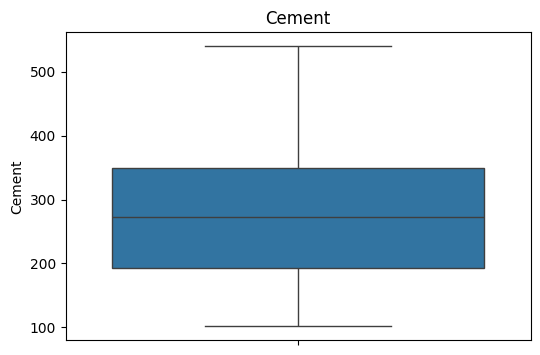

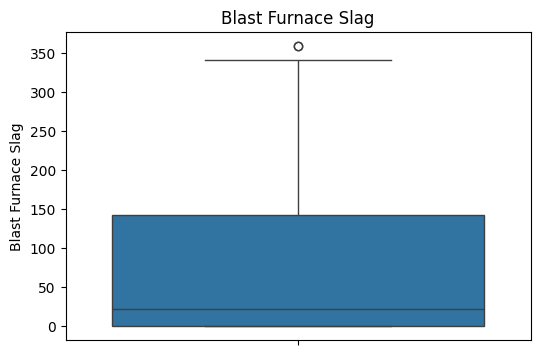

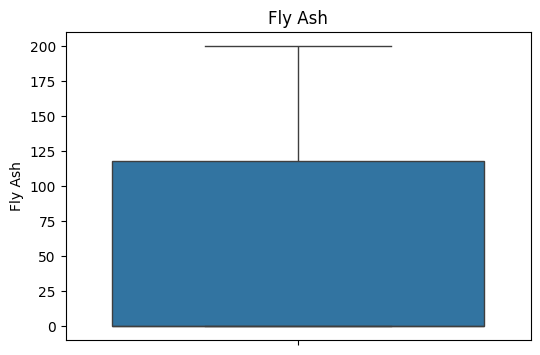

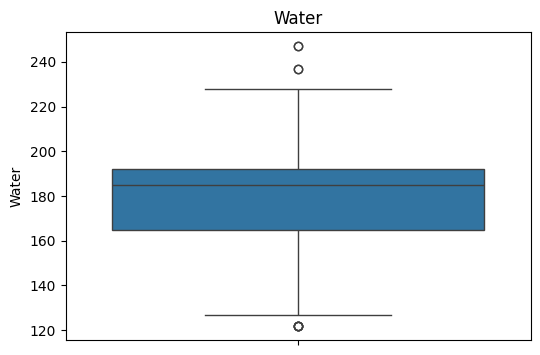

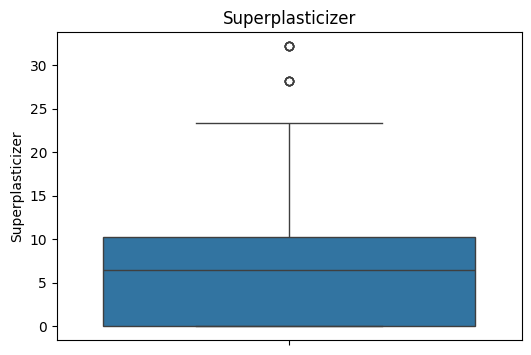

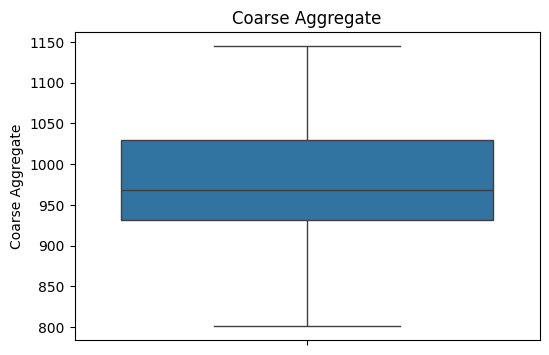

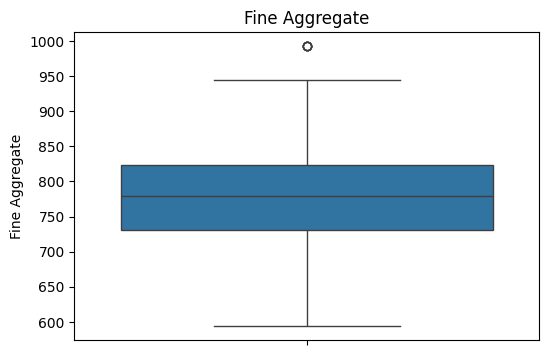

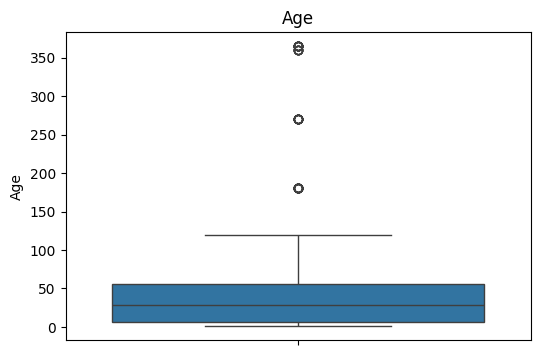

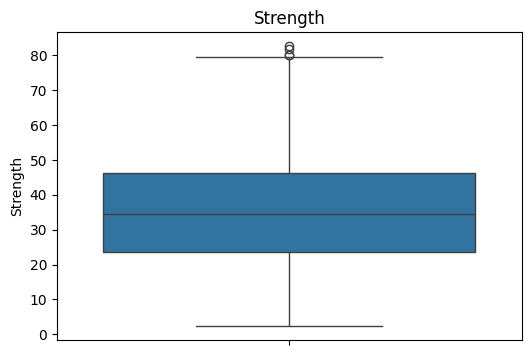

In [11]:
for i in con.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=con[i])
    plt.title(f'{i}')
    plt.show()